# Contour detection


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


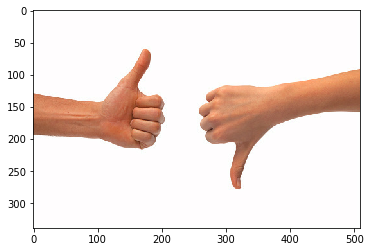

In [3]:
image = cv2.imread(r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_3_Types_of_Features_Image_Segmentation\images\thumbs_up_down.jpg')
# make a copy 
image_copy = image.copy()

# change color to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)


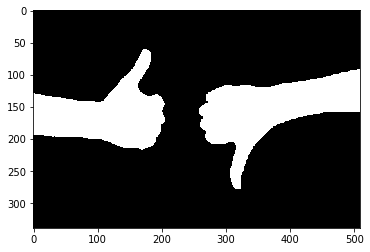

In [4]:
# convert the image to a gray scale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# create a binary image 
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap = 'gray')

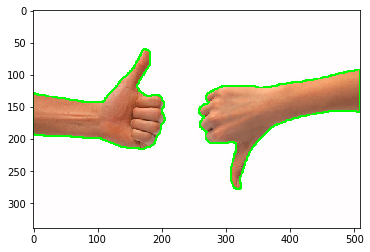

In [5]:
# find contours in the binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw contours 
image_copy2 = np.copy(image_copy)
all_contours = cv2.drawContours(image_copy2, contours, -1, (0,255,0),2)

plt.imshow(all_contours)

## Contour features
Every contour has a number of feature that lets us, calculate,
- contour area
- orientation
- perimeter, etc..

### Orientation
To find the orientation, we have to first fit an ellipse and then extract the shape from it


In [7]:

def orientations(contours):
    angles = []
    for cnt in contours:
        (x,y), (MA, ma),angle = cv2.fitEllipse(cnt)
        angles.append(angle)  
    return angles

angles = orientations(contours)
print('Anles of each contours in degrees',angles)


Anles of each contours in degrees [61.35833740234375, 82.27550506591797]


### Bounding Rectangle:
find the thumps up contour and use a bounding rectangle to crop


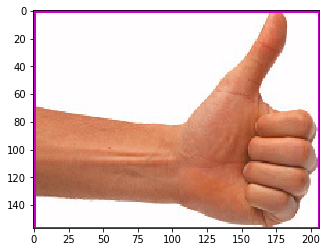

In [9]:
def left_hand_crop(image,selected_contour):
    x,y,w,h = cv2.boundingRect(selected_contour)
    box_image = cv2.rectangle(image,(x,y),(x+w,y+h),(200,0,200),2)
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y:y+h, x:x+w]
    return cropped_image

contour_index = np.argmax(angles)
left_hand = left_hand_crop(image_copy, contours[contour_index])
plt.imshow(left_hand)